# Lista 3

### Zaimplementowane biblioteki

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy as sp

### Zadanie 1

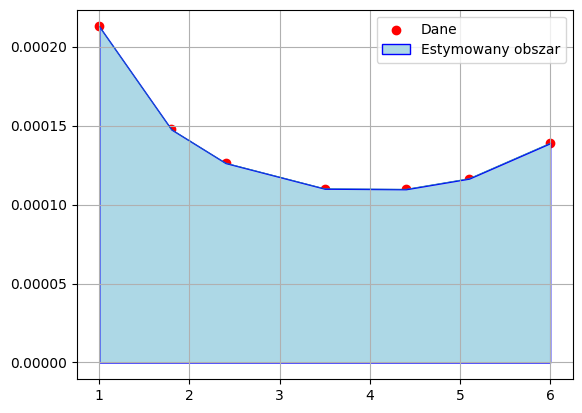

In [9]:
v = np.array([1.0, 1.8, 2.4, 3.5, 4.4, 5.1, 6.0])
p = np.array([4.7, 12.2, 19.0, 31.8, 40.1, 43.8, 43.2])*1000

plt.scatter(v ,v/p, label='Dane', c='r')
plt.plot(v, v/p, linewidth=0.5)
plt.fill_between(v, 0 ,v/p, edgecolor='blue', facecolor='lightblue', label='Estymowany obszar')
plt.grid()
plt.legend()

In [8]:
def trapezoidal(xs, ys):
    integral = 0
    n = len(xs)
    for i in range(1, n):
        integral += (xs[i]-xs[i-1])*(ys[i-1]+ys[i])/2
    return integral
m = 2000
integral = trapezoidal(v, v/p)
print(f'Czas potrzebny do rozpędzenia samochodu jest równy {integral*m:.4f} s.')



Czas potrzebny do rozpędzenia samochodu jest równy 1.2985 s.


### Zadanie 2

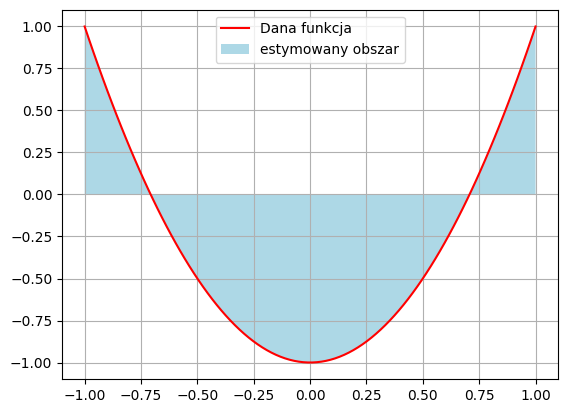

In [11]:
def f(x):
    return np.cos(2*np.arccos(x))

xs = np.linspace(-1,1,100)
plt.plot(xs, f(xs), color='red', label='Dana funkcja')
plt.fill_between(xs, f(xs), 0, facecolor='lightblue', label='estymowany obszar')
plt.grid()
plt.legend()

In [12]:
def simpson(f, a, b, nodes):
    n = nodes-1
    h = (b-a)/n
    x0 = f(a)
    xn = f(b)
    xi = 0
    xj = 0
    for i in range(1, n):
        x = a + i*h
        if i%2 ==0:
            xi += f(x)
        else:
            xj += f(x)
    integral = h*(x0 + 4*xj + 2*xi + xn)/3
    return integral

simpson(f, -1, 1, 3), simpson(f, -1, 1, 5), simpson(f, -1, 1, 7), sp.integrate.quad(f, -1, 1)[0]

(-0.6666666666666666,
 -0.6666666666666665,
 -0.6666666666666666,
 -0.6666666666666666)

### Zadanie 3

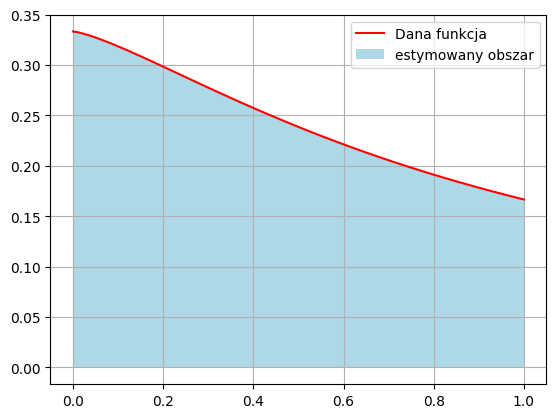

In [14]:
def f(x):
    return 1/(3*(1+x**(4/3)))

xs = np.linspace(0,1,100)
plt.plot(xs, f(xs), color='red', label='Dana funkcja')
plt.fill_between(xs, f(xs), 0, facecolor='lightblue', label='estymowany obszar')
plt.grid()
plt.legend()

In [15]:
def trapezoidal(f, a, b, nodes):
    n = nodes-1
    h = (b-a)/n
    x0 = f(a)
    xn = f(b)
    mid = 0
    for i in range(1, n):
        x = a+i*h
        mid += f(x) 
    integral = h*((xn+x0)/2 + mid)
    return integral

trapezoidal(f, 0, 1, 6), sp.integrate.quad(f, 0, 1)[0]

(0.24369830404429738, 0.24374774720415945)

### Zadanie 4

In [41]:
def f(x, x0=15):
    return 1/np.sqrt(1-((np.sin(np.radians(x0)/2))**2 * (np.sin(x))**2))
def simpson(f, a, b, n, x0):
    h = (b-a)/n
    xa = f(a, x0)
    xb = f(b, x0)
    xi = 0
    xj = 0
    for i in range(1, n):
        x = a + i*h
        if i%2 ==0:
            xi += f(x, x0)
        else:
            xj += f(x, x0)
    integral = h*(xa + 4*xj + 2*xi + xb)/3
    return integral

x0s = [15, 30 ,45]
for x0 in x0s:
    print(f'Wyliczona wartość całki dla kąta {x0} stopni wynosi {simpson(f, 0, np.pi/2, 1000, x0):.4f}')
    def f(x, x0=x0):
        return 1/np.sqrt(1-((np.sin(np.radians(x0)/2))**2 * (np.sin(x))**2))
    print(f'Wartość dokładna {sp.integrate.quad(f, 0, np.pi/2)[0]:.4f}')

Wyliczona wartość całki dla kąta 15 stopni wynosi 1.5776
Wartość dokładna 1.5776
Wyliczona wartość całki dla kąta 30 stopni wynosi 1.5981
Wartość dokładna 1.5981
Wyliczona wartość całki dla kąta 45 stopni wynosi 1.6336
Wartość dokładna 1.6336


### Zadanie 5

In [45]:
def f(x):
    return np.log(x)/(x**2-2*x+2)

def GaussLegendre(f, a, b, weights, nodes):
    n = len(nodes)
    h = (b-a)/2
    c = (a+b)/2
    val = 0
    for i in range(0, n):
        val += weights[i]*f(h*nodes[i]+c)
    integral = h*val
    return integral

GaussLegendre(f, 1, np.pi, np.ones(2), np.array([-1/np.sqrt(3),1/np.sqrt(3)])), GaussLegendre(f,
            1,
            np.pi,
            np.array([(18-np.sqrt(30))/36, (18+np.sqrt(30))/36, (18+np.sqrt(30))/36, (18-np.sqrt(30))/36]),
            np.array([-np.sqrt(3/7 + 2*np.sqrt(6/5)/7), -np.sqrt(3/7 - 2*np.sqrt(6/5)/7), np.sqrt(3/7 - 2*np.sqrt(6/5)/7), np.sqrt(3/7 + 2*np.sqrt(6/5)/7)]),
            ), sp.integrate.quad(f, 1, np.pi)[0]

(0.6067250228624488, 0.5847680362127091, 0.5849428069312876)

### Zadanie 6

#### $f_{1}$

In [48]:
def f(x):
    return x**3 - 2*x

hs = np.array([0.1, 0.01, 0.001])

df1 = [(f(1+h)-f(1))/h for h in hs] 
dc2 = [(f(1+h)-f(1-h))/(2*h) for h in hs]
dc4 = [(4*(f(1+h)-f(1-h))/(2*h) - (f(1+2*h)-f(1-2*h))/(4*h))/3 for h in hs]
np.ones(3)-df1, np.ones(3)-dc2, np.ones(3)-dc4


(array([-0.31    , -0.0301  , -0.003001]),
 array([-1.00000000e-02, -1.00000000e-04, -9.99999973e-07]),
 array([-1.11022302e-15, -4.66293670e-15,  3.60822483e-14]))

#### $f_{2}$

In [52]:
def f(x):
    return np.sin(x)

hs = np.array([0.1, 0.01, 0.001])

df1 = [(f(np.pi/3+h)-f(np.pi/3))/h for h in hs] 
dc2 = [(f(np.pi/3+h)-f(np.pi/3-h))/(2*h) for h in hs]
dc4 = [(4*(f(np.pi/3+h)-f(np.pi/3-h))/(2*h) - (f(np.pi/3+2*h)-f(np.pi/3-2*h))/(4*h))/3 for h in hs]
np.ones(3)/2-df1, np.ones(3)/2-dc2, np.ones(3)/2-dc4

(array([0.04409811, 0.00433842, 0.0004331 ]),
 array([8.32916766e-04, 8.33329166e-06, 8.33333953e-08]),
 array([1.66468370e-06, 1.66658853e-10, 1.10578213e-13]))

#### $f_{3}$

In [51]:
def f(x):
    return np.exp(x)

hs = np.array([0.1, 0.01, 0.001])

df1 = [(f(0+h)-f(0))/h for h in hs] 
dc2 = [(f(0+h)-f(0-h))/(2*h) for h in hs]
dc4 = [(4*(f(0+h)-f(0-h))/(2*h) - (f(0+2*h)-f(0-2*h))/(4*h))/3 for h in hs]
np.ones(3)-df1, np.ones(3)-dc2, np.ones(3)-dc4

(array([-0.05170918, -0.00501671, -0.00050017]),
 array([-1.66750020e-03, -1.66667500e-05, -1.66666681e-07]),
 array([3.33730390e-06, 3.33348127e-10, 2.69784195e-14]))

### Zadanie 7

In [17]:
xs = np.array([0.0, 0.1, 0.2, 0.3, 0.4])
ys = np.array([0.000000, 0.078348, 0.138910, 0.192916, 0.244981])

h=0.1
x = 0.2
Dc4 = 4*(ys[3]-ys[1])/(2*h) - ((ys[4]-ys[0])/(4*h))
fPrim = Dc4/3

C:\Users\marci\AppData\Local\Temp\ipykernel_12124\2530820063.py:8: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  fPrim, sp.misc.derivative(poly, 0.2, 0.0001)


(0.5596358333333334, 0.5596358465374818)

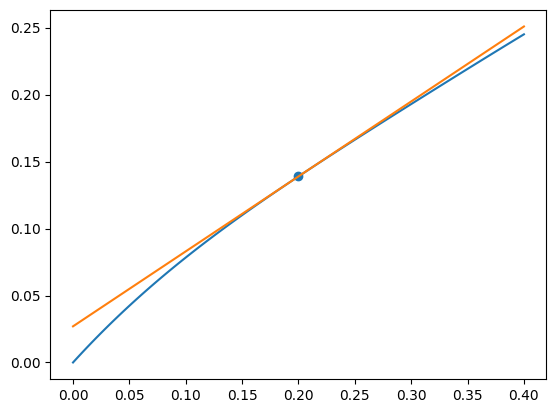

In [21]:
coeffs = np.polyfit(xs, ys, 4)
xAxis = np.linspace(0,0.4,100)
def poly(x):
    return coeffs[0]*x**4 + coeffs[1]*x**3 + coeffs[2]*x**2 + coeffs[3]*x + coeffs[4]
plt.plot(xAxis, poly(xAxis))
plt.scatter(xs[2],ys[2])
plt.plot(xAxis, fPrim*xAxis + ys[2]-fPrim*xs[2])
fPrim, sp.misc.derivative(poly, 0.2, 0.0001)

### Zadanie 8

In [23]:
def partial_elimination(A,b):
    A = np.array(A).astype(float)
    b = np.array(b).astype(float)
    n = len(b)
    row_idx = 0
    col_idx = 0
    for i in range(n-1):
        col_nums = []
        col_nums.append(A[row_idx:,i])
        col_max = np.max(col_nums)
        pivot_row = np.argwhere(A[:,col_idx]==col_max)[-1][0]
        A[[row_idx, pivot_row]] = A[[pivot_row, row_idx]]
        b[[row_idx, pivot_row]] = b[[pivot_row, row_idx]]
        for k in range(row_idx, n-1):
            lam = A[k+1,col_idx]/A[row_idx,col_idx]
            A[k+1, :] = A[k+1, :] - lam*A[row_idx, :]
            b[k+1] = b[k+1] - lam*b[row_idx]
        row_idx += 1
        col_idx += 1  
    for k in range(n-1,-1,-1):
        b[k] = (b[k] - np.dot(A[k,k+ 1:n],b[k+ 1:n]))/A[k,k] 
    return A, b 

In [24]:
xData = np.array([-2.2, -0.3, 0.8, 1.9])
yData = np.array([15.180, 10.962, 1.920, -2.040])
n=len(xData)
A = np.array([[n, np.sum(xData), np.sum(xData**2), np.sum(xData**3)],
     [np.sum(xData), np.sum(xData**2), np.sum(xData**3), np.sum(xData**4)],
     [np.sum(xData**2), np.sum(xData**3), np.sum(xData**4), np.sum(xData**5)],
     [np.sum(xData**3), np.sum(xData**4), np.sum(xData**5), np.sum(xData**6)]])
b = np.array([np.sum(yData), np.sum(xData*yData), np.sum(yData*xData**2), np.sum(yData*xData**3)])

_, coeffs = partial_elimination(A, b.T)

def poly(x):
    return coeffs[3]*x**3 + coeffs[2]*x**2 + coeffs[1]*x + coeffs[0]

def firstDerivative(x):
    return 3*x**2*coeffs[3] + 2*x*coeffs[2] + coeffs[1]

def secondDerivative(x):
    return 6*x*coeffs[3] + 2*coeffs[2]

fPrim, fBis = firstDerivative(0), secondDerivative(0)
print(f'Wyliczona pierwsza pochodna: {fPrim}, wynik dokładny: {sp.misc.derivative(poly, 0, 0.01, n=1)}')
print(f'Wyliczona druga pochodna: {fBis}, wynik dokładny: {sp.misc.derivative(poly, 0, 0.01, n=2)}')

Wyliczona pierwsza pochodna: -8.559999999999986, wynik dokładny: -8.559899999999931
Wyliczona druga pochodna: -0.5999999999999991, wynik dokładny: -0.5999999999950489


C:\Users\marci\AppData\Local\Temp\ipykernel_12124\3888630847.py:22: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  print(f'Wyliczona pierwsza pochodna: {fPrim}, wynik dokładny: {sp.misc.derivative(poly, 0, 0.01, n=1)}')
C:\Users\marci\AppData\Local\Temp\ipykernel_12124\3888630847.py:23: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  print(f'Wyliczona druga pochodna: {fBis}, wynik dokładny: {sp.misc.derivative(poly, 0, 0.01, n=2)}')


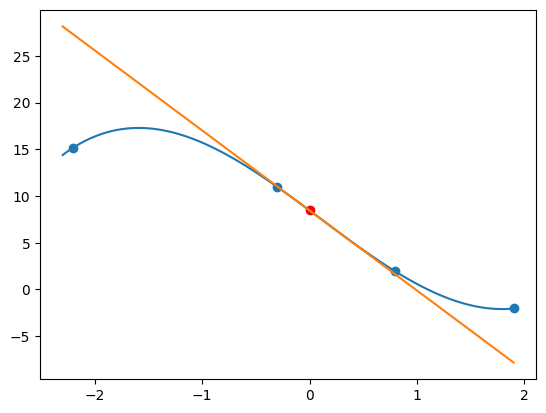

In [25]:
xAxis = np.linspace(-2.3,1.9,100)
plt.plot(xAxis, poly(xAxis))
plt.scatter(xData,yData)
plt.scatter(0, poly(0), color='r')
plt.plot(xAxis, fPrim*xAxis + poly(0))